<a href="https://colab.research.google.com/github/ihagoSantos/machine_learning/blob/main/decision_tree_weather_nominal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de decisão

### Base de dados: Clima-Nominal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

WEATHER.NOMINAL, Weka

http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html

DESCRIÇÃO DOS ATRIBUTOS:

1. Aparência {Ensolarado, Nublado, Chuvoso}
2. Temperatura {Quente, Moderado, Frio}
3. Umidade {Alta, Normal}
4. Vento {Fraco, Forte}
5. Jogar {Sim, Não}


In [52]:
!pip install pydotplus
!pip install dtreeviz

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# WEATHER.NOMINAL, Weka
# http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html
# DESCRIÇÃO DOS ATRIBUTOS:
# Aparência {Ensolarado, Nublado, Chuvoso}
# Temperatura {Quente, Moderado, Frio}
# Umidade {Alta, Normal}
# Vento {Fraco, Forte}
# Jogar {Sim, Não}

from google.colab import files
uploaded = files.upload()

Saving clima.xlsx to clima.xlsx


### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Importando dataset

In [3]:
nominal_weather = pd.read_excel('clima.xlsx', sheet_name = 0)
nominal_weather

,Aparência,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,85,85,Fraco,Não
1,Ensolarado,80,90,Forte,Não
2,Nublado,83,86,Fraco,Sim
3,Chuvoso,70,96,Fraco,Sim
4,Chuvoso,68,80,Fraco,Sim
5,Chuvoso,65,70,Forte,Não
6,Nublado,64,65,Forte,Sim
7,Ensolarado,72,95,Fraco,Não
8,Ensolarado,69,70,Fraco,Sim
9,Chuvoso,75,80,Fraco,Sim


In [5]:
print("Dimensões: {0}".format(nominal_weather.shape))
print("Campos: {0}".format(nominal_weather.columns))

Dimensões: (14, 5)
Campos: Index(['Aparência', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')


In [6]:
nominal_weather.describe()

,Temperatura,Umidade
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


In [7]:
nominal_weather.dtypes

,0
Aparência,object
Temperatura,int64
Umidade,int64
Vento,object
Jogar,object


### Convertendo os atributos para dicionário

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

In [21]:
X_dict = nominal_weather.iloc[:, :4].T.to_dict().values()

# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

Atributos: dict_values([{'Aparência': 'Ensolarado', 'Temperatura': 85, 'Umidade': 85, 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 80, 'Umidade': 90, 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 83, 'Umidade': 86, 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 70, 'Umidade': 96, 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 68, 'Umidade': 80, 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 65, 'Umidade': 70, 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 64, 'Umidade': 65, 'Vento': 'Forte'}, {'Aparência': 'Ensolarado', 'Temperatura': 72, 'Umidade': 95, 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 69, 'Umidade': 70, 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 75, 'Umidade': 80, 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 75, 'Umidade': 70, 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 72, 'Umidade': 90, 'Vento': 'Forte'}, {'Aparência': 'Nublado', 

In [23]:
vect = DictVectorizer(sparse=False)
X_train = vect.fit_transform(X_dict)
print(X_train)
# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento: {0}".format(X_train.shape))


[[ 0.  1.  0. 85. 85.  0.  1.]
 [ 0.  1.  0. 80. 90.  1.  0.]
 [ 0.  0.  1. 83. 86.  0.  1.]
 [ 1.  0.  0. 70. 96.  0.  1.]
 [ 1.  0.  0. 68. 80.  0.  1.]
 [ 1.  0.  0. 65. 70.  1.  0.]
 [ 0.  0.  1. 64. 65.  1.  0.]
 [ 0.  1.  0. 72. 95.  0.  1.]
 [ 0.  1.  0. 69. 70.  0.  1.]
 [ 1.  0.  0. 75. 80.  0.  1.]
 [ 0.  1.  0. 75. 70.  1.  0.]
 [ 0.  0.  1. 72. 90.  1.  0.]
 [ 0.  0.  1. 81. 75.  0.  1.]
 [ 1.  0.  0. 71. 91.  1.  0.]]
Shape do dado de treinamento: (14, 7)


### Convertendo a classe em labels
A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>

In [25]:
le = LabelEncoder()
y_train = le.fit_transform(nominal_weather.iloc[:,4])
print("Labels:", y_train)

Labels: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


### Indução do modelo

Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```

#### Instanciar o modelo

In [26]:
classifier = DecisionTreeClassifier(
    random_state=0,
    criterion='entropy'
)

#### Treinar o modelo

In [29]:
weather_tree = classifier.fit(
    X_train,
    y_train
)
score = weather_tree.score(X_train, y_train)
print("Acuracy: ", score)

Acuracy:  1.0


#### Testar o modelo

In [31]:
y_pred = weather_tree.predict(X_train)
print("Acurácia da previsão: ", accuracy_score(y_train, y_pred))

Acurácia da previsão:  1.0


In [33]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



### Exibição da árvore

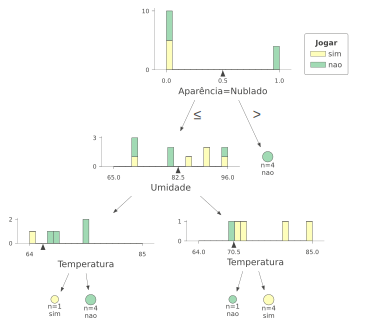

In [56]:
import dtreeviz
from dtreeviz.trees import *

viz = dtreeviz.model(
        classifier,
        X_train,
        y_train,
        target_name='Jogar',
        feature_names=vect.feature_names_,
        class_names=["sim", "nao"]
)

viz.view()

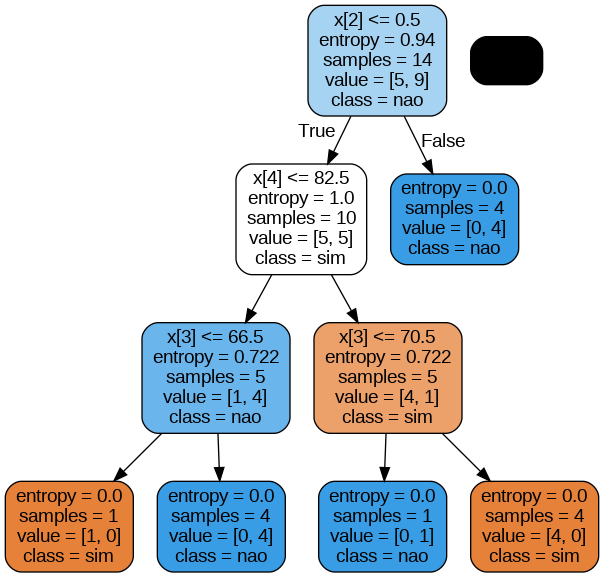

In [58]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    weather_tree,
    out_file=None,
    rounded=True,
    filled=True,
    class_names=["sim","nao"]
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())